In [1]:
%pylab inline
import matplotlib.pyplot as plt

#import matplotlib
#matplotlib.style.use('ggplot') ## gnuplot style

import numpy as np
import pandas as pd

#size
width, height=12,8
plt.rcParams['figure.figsize'] = width, height #aggiunta pt

#precision in tables
pd.set_option('precision',2)
#rows in tables
pd.set_option('display.max_rows', 1000)

# this is used for regression below; install (via pip) statsmodels and patsy
import statsmodels.formula.api as sm

Populating the interactive namespace from numpy and matplotlib


In [2]:
# to chose a csv file in the current folder
import os
filesHere=os.listdir("./")
selected=[]
for i in range(len(filesHere)):
    if filesHere[i].find('_ts.csv')>0: selected.append(filesHere[i])
for i in range(len(selected)):
    print (i, selected[i])

0 20180119_06-29-49_ts.csv


In [3]:
num=int(input("Choose a file via its number (>=0;<="+str(len(selected)-1)+" "))

try:
    modPars_df = pd.read_csv(selected[num][:17]+'_modPars.csv')
    modPars_df.index += 1 
except BaseException:
    modPars_df = pd.DataFrame([["no changes in parameters"]],columns=["  "])
    modPars_df.index += 1

firms=False
    
try:
    firms_df = pd.read_csv(selected[num][:17]+'_firms.csv')
    modPars_df.index += 1 
    firms=True
except BaseException:
    pass


par_df = pd.read_csv(selected[num][:17]+'_par.csv')
par_df.index += 1 

ts_df = pd.read_csv(selected[num])
#set index to start from 1, data are collected at the end of each period
ts_df.index += 1 

str_df = pd.read_csv(selected[num][:17]+'_str.csv')
#leave index to start from 0, data are collected at the beginning of each period

Choose a file via its number (>=0;<=0 0


***Parameters***

In [4]:
par_df.astype(str,errors='ignore')

,Parameter internal names,Parameter definitions,Values
1,projectVersion,project version,"develHayekianMarket, will be V6,"
2,build,build,20180119
3,mySeed,seed (1 gets it from the clock),1111
4,wage,wage base,1.0
5,socialWelfareCompensation,social welfare compensation,0.3
6,laborProductivity,labor productivity,1
7,rho,expected employment ratio at t=1,0.9
8,a1,consumption behavior: a1,0.4
9,b1,consumption behavior: b1,0.6
10,a2,consumption behavior: a2,0.3


***Modified parameters***

In [5]:
modPars_df.astype(str,errors='ignore')

,
2,no changes in parameters


***Time series, data collected at the end of each period***

In [6]:
ts_df

,unemployed,totalProfit,totalProduction,plannedProduction,consumptionQ,hPriceSd,price,wage
1,1120,1132.37,8890.00,8890.00,NaN,NaN,1.13,1.00
2,1117,1580.32,8893.00,8899.27,NaN,NaN,1.18,1.15
3,1634,-1104.66,8495.71,9249.77,NaN,NaN,1.11,1.00
4,2140,-430.50,7791.55,7878.74,NaN,NaN,1.03,1.00
5,2758,279.75,7191.88,7259.56,NaN,NaN,1.13,1.00
6,2092,845.34,7918.00,7928.59,7063.45,0.03,1.24,1.00
7,2933,1223.55,7052.41,7089.83,6886.62,0.03,1.24,1.15
8,3203,-313.28,6794.95,6824.58,6794.95,0.03,1.24,1.00
9,3146,295.67,6853.26,6881.40,6501.34,0.03,1.24,1.00
10,3594,440.63,6342.33,6436.29,6306.92,0.03,1.24,1.00


In [7]:
ts_df.describe()

,unemployed,totalProfit,totalProduction,plannedProduction,consumptionQ,hPriceSd,price,wage
count,50.00,50.00,50.00,50.00,45.00,4.50e+01,50.00,50.00
mean,4563.64,499.10,5953.25,6008.85,5659.67,2.74e-02,1.23,1.06
std,1400.92,768.86,1021.83,1059.31,584.75,9.74e-04,0.04,0.07
min,1117.00,-1104.66,4785.00,4801.99,4785.00,2.67e-02,1.03,1.00
25%,3886.00,-204.69,5158.25,5194.24,5109.70,2.70e-02,1.24,1.00
50%,4827.50,716.84,5871.61,5937.96,5732.17,2.73e-02,1.24,1.00
75%,5588.50,1199.61,6231.22,6265.02,5970.94,2.75e-02,1.24,1.15
max,6626.00,1580.32,8893.00,9249.77,7063.45,3.34e-02,1.24,1.15


In [8]:
ts_df.corr(method="pearson").style.format("{:.2}")

,unemployed,totalProfit,totalProduction,plannedProduction,consumptionQ,hPriceSd,price,wage
unemployed,1.0,-0.4,-0.86,-0.85,-0.68,-0.27,0.58,-0.21
totalProfit,-0.4,1.0,-0.0077,-0.042,0.023,-0.17,0.2,0.77
totalProduction,-0.86,-0.0077,1.0,1.0,0.98,0.54,-0.64,-0.14
plannedProduction,-0.85,-0.042,1.0,1.0,0.99,0.54,-0.66,-0.15
consumptionQ,-0.68,0.023,0.98,0.99,1.0,0.42,0.78,-0.1
hPriceSd,-0.27,-0.17,0.54,0.54,0.42,1.0,0.21,-0.33
price,0.58,0.2,-0.64,-0.66,0.78,0.21,1.0,0.19
wage,-0.21,0.77,-0.14,-0.15,-0.1,-0.33,0.19,1.0


In [9]:
result = sm.ols(formula="totalProfit ~ price + wage + totalProduction + unemployed", \
                data=ts_df).fit()

print (result.summary())

                            OLS Regression Results                            
Dep. Variable:            totalProfit   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     43.79
Date:                Fri, 19 Jan 2018   Prob (F-statistic):           5.79e-15
Time:                        09:22:52   Log-Likelihood:                -363.00
No. Observations:                  50   AIC:                             736.0
Df Residuals:                      45   BIC:                             745.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5205.3541   2725.208     

***Structural infos, data collected at the beginning of each period***

In [10]:
str_df

,entrepreneurs,workers
0,10,10000
1,10,10000
2,22,9988
3,20,9990
4,20,9990
5,20,9990
6,24,9986
7,35,9975
8,35,9975
9,40,9970


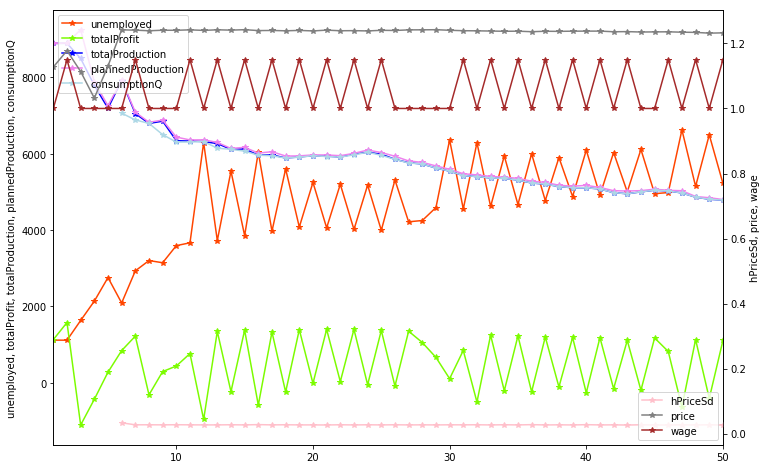

In [16]:
myPlot = ts_df.plot(secondary_y=['hPriceSd', 'price','wage'],marker="*",
color=["OrangeRed","LawnGreen","Blue","Violet","lightblue","Pink","Gray","Brown"])
myPlot.set_ylabel('unemployed, totalProfit, totalProduction, plannedProduction, consumptionQ')
myPlot.right_ax.set_ylabel('hPriceSd, price, wage')
myPlot.legend(loc='upper left') #, bbox_to_anchor=(-0.35, 0.5)
myPlot.axes.right_ax.legend(loc='lower right') #, bbox_to_anchor=(1.1, 0.5)

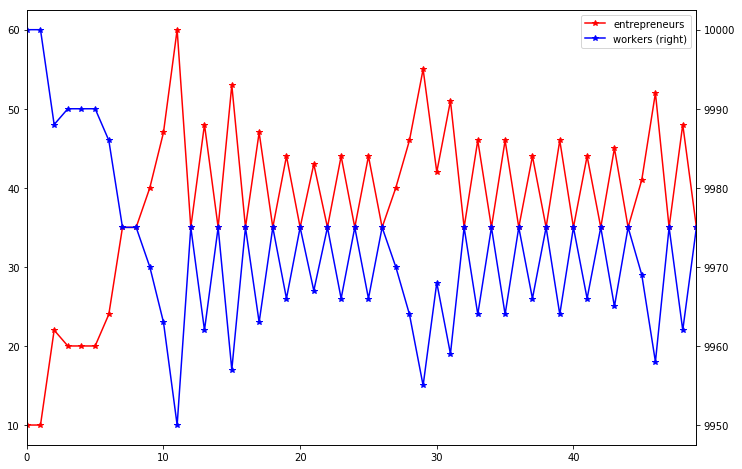

In [12]:
str_df.plot(secondary_y='workers',marker="*",color=["r","b"])

Best solutions to produce a LaTeX table from these data (the example is related to ts_df.corr table):

    corr=ts_df.corr(method='pearson')
    print corr.to_latex()
    
    "print" to have the output nicely formatted; copy and paste it to LaTeX and the 
    result works.
    
To use caption and label with tabular simply include that output within:

    \begin{table}
    
    output above
    
    \label{a label}
    \caption{a caption}
    \end{table}

    You can add the usual [htbp] specification as \begin{table}[htbp]


Other solutions:
1. online [http://www.tablesgenerator.com](http://www.tablesgenerator.com), reading the csv file;
2. using a converter as [http://html2latex.sourceforge.net](http://html2latex.sourceforge.net).

## The first method is applied in the cell below.

In [17]:
corr=ts_df.corr(method='pearson')
def ff(x):
    return '%1.2f' % x
print (corr.to_latex(formatters=[ff,ff,ff,ff,ff,ff,ff,ff]))

\begin{tabular}{lrrrrrrrr}
\toprule
{} & unemployed & totalProfit & totalProduction & plannedProduction & consumptionQ & hPriceSd & price &  wage \\
\midrule
unemployed        &       1.00 &       -0.40 &           -0.86 &             -0.85 &        -0.68 &    -0.27 &  0.58 & -0.21 \\
totalProfit       &      -0.40 &        1.00 &           -0.01 &             -0.04 &         0.02 &    -0.17 &  0.20 &  0.77 \\
totalProduction   &      -0.86 &       -0.01 &            1.00 &              1.00 &         0.98 &     0.54 & -0.64 & -0.14 \\
plannedProduction &      -0.85 &       -0.04 &            1.00 &              1.00 &         0.99 &     0.54 & -0.66 & -0.15 \\
consumptionQ      &      -0.68 &        0.02 &            0.98 &              0.99 &         1.00 &     0.42 &  0.78 & -0.10 \\
hPriceSd          &      -0.27 &       -0.17 &            0.54 &              0.54 &         0.42 &     1.00 &  0.21 & -0.33 \\
price             &       0.58 &        0.20 &           -0.64 &          

## *Data from each firm in each period*

In [ ]:
if firms: print(firms_df.describe())
else: print('no data for each firm in each period')